# SVM Terrain Classifier
This project demonstrates how to use a **Support Vector Machine (SVM)** to classify terrain types in a topographical map. The goal is to segment a map of the southern part of the Balkans into three key terrain categories:
- Plains
- Highland
- Water


It's highly reccomended to have a map which contains simple colors, distinguishing the differences between terrain types.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from PIL import Image

## Workflow
### 1. Load and Preprocess the Image
The image is loaded using the Pillow library and then converted to a NumPy array for easier manipulation and compatibility with machine learning libraries like scikit-learn.

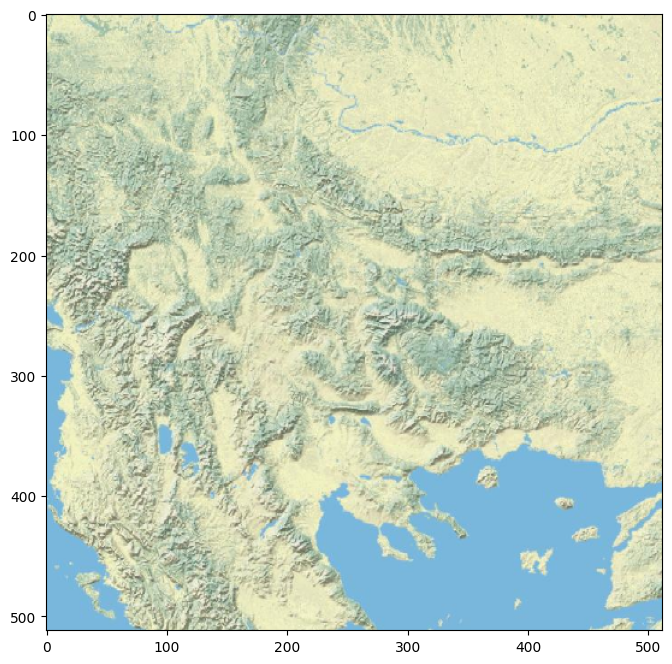

In [139]:
image_path = 'upper-greece.jpg'
image = np.array(Image.open(image_path))
plt.figure(figsize = [8,8])
plt.imshow(image)
plt.show()

### 2. Select Training Subregions
We manually select small regions from the image that clearly represent each terrain type. These regions will be used to train the classifier. Each subregion corresponds to one of the three terrain classes: plains, highlands, or water.

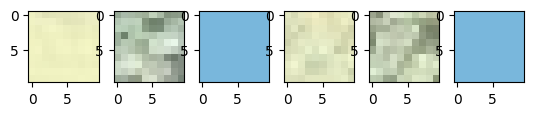

In [140]:
# Manually selecting diverse regions for plains, highlands, and water
sub = [
    image[380:390, 220:230],   # Highlands
    image[200:210, 50:60],     # Plains
    image[500:510, 300:310],   # Water
    image[250:260, 470:480],   # Additional plains region
    image[500:510, 120:130],   # Additional highlands region
    image[370:380, 400:410]    # Additional water region
]

for i in range(len(sub)):
    plt.subplot(1, len(sub), i + 1)
    plt.imshow(sub[i])
plt.show()


### 3. Prepare the Training Data
We flatten the subregions into a list of pixel RGB values and assign labels corresponding to the terrain type:

- 0: Plains
- 1: Highlands
- 2: Water

In [141]:
# Preparing the training data: Flattening the subregions into pixel data
data = []
target = []
target_names = ['plains', 'highlands', 'water']  # Class names

# Assigning labels based on which terrain the region represents
labels = [0, 1, 2, 0, 1, 2]  # Label each subregion

for idx, region in enumerate(sub):
    for row in range(region.shape[0]):
        for col in range(region.shape[1]):
            data.append(region[row, col])  # Add the RGB values of the pixel
            target.append(labels[idx])     # Append the class label

# Convert data and target into numpy arrays for easier manipulation
data = np.array(data)
target = np.array(target)

### 4. Train the SVM Classifier
We use scikit-learn's **SVC** class with the RBF kernel. The <code>gamma</code> parameter controls how far the influence of each training point reaches.

In [142]:
# import the model
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10, gamma=0.01)
model.fit(data, target)

SVC(C=10, gamma=0.01)

### 5. Predict Terrain Types for the Entire Image
After training, the model is used to predict the terrain type for every pixel in the image. The result is an array where each pixel is classified as one of the terrain types.

In [143]:
ROW,COL,RGB = np.shape(image)
image_flat = image.reshape(ROW * COL, RGB)

# Predict terrain types for the entire image
predicted_classes = model.predict(image_flat)
predicted_classes = predicted_classes.reshape(ROW, COL)

In [144]:
output = np.zeros((3, ROW, COL, RGB))

for i in range(ROW):
    for j in range(COL):
        output[predicted_classes[i, j]][i, j] = image[i, j]
            

 Convert datatype to uint8 because the function "imshow" will work properly only with floating point between 0-1, or unit8 integer between 0-255.

In [145]:
output = output.astype(np.uint8)

### 6. Verify Pixel Values
We can print the RGB values of certain pixels to verify that the predictions are non-zero and correspond to actual terrain classes.

In [146]:
# test values to actually show that the pixels are not non-zero
print("Pixel values for class 0 (water):", output[0][0][0])
print("Pixel values for class 2 (highlands):", output[1][0][0])
print("Pixel values for class 2 (plains):", output[2][0][0])

Pixel values for class 0 (water): [229 232 189]
Pixel values for class 2 (highlands): [0 0 0]
Pixel values for class 2 (plains): [0 0 0]


### 7. Visualize the Results
The map is segmented based on the predicted terrain types. Each class is displayed as a separate image.

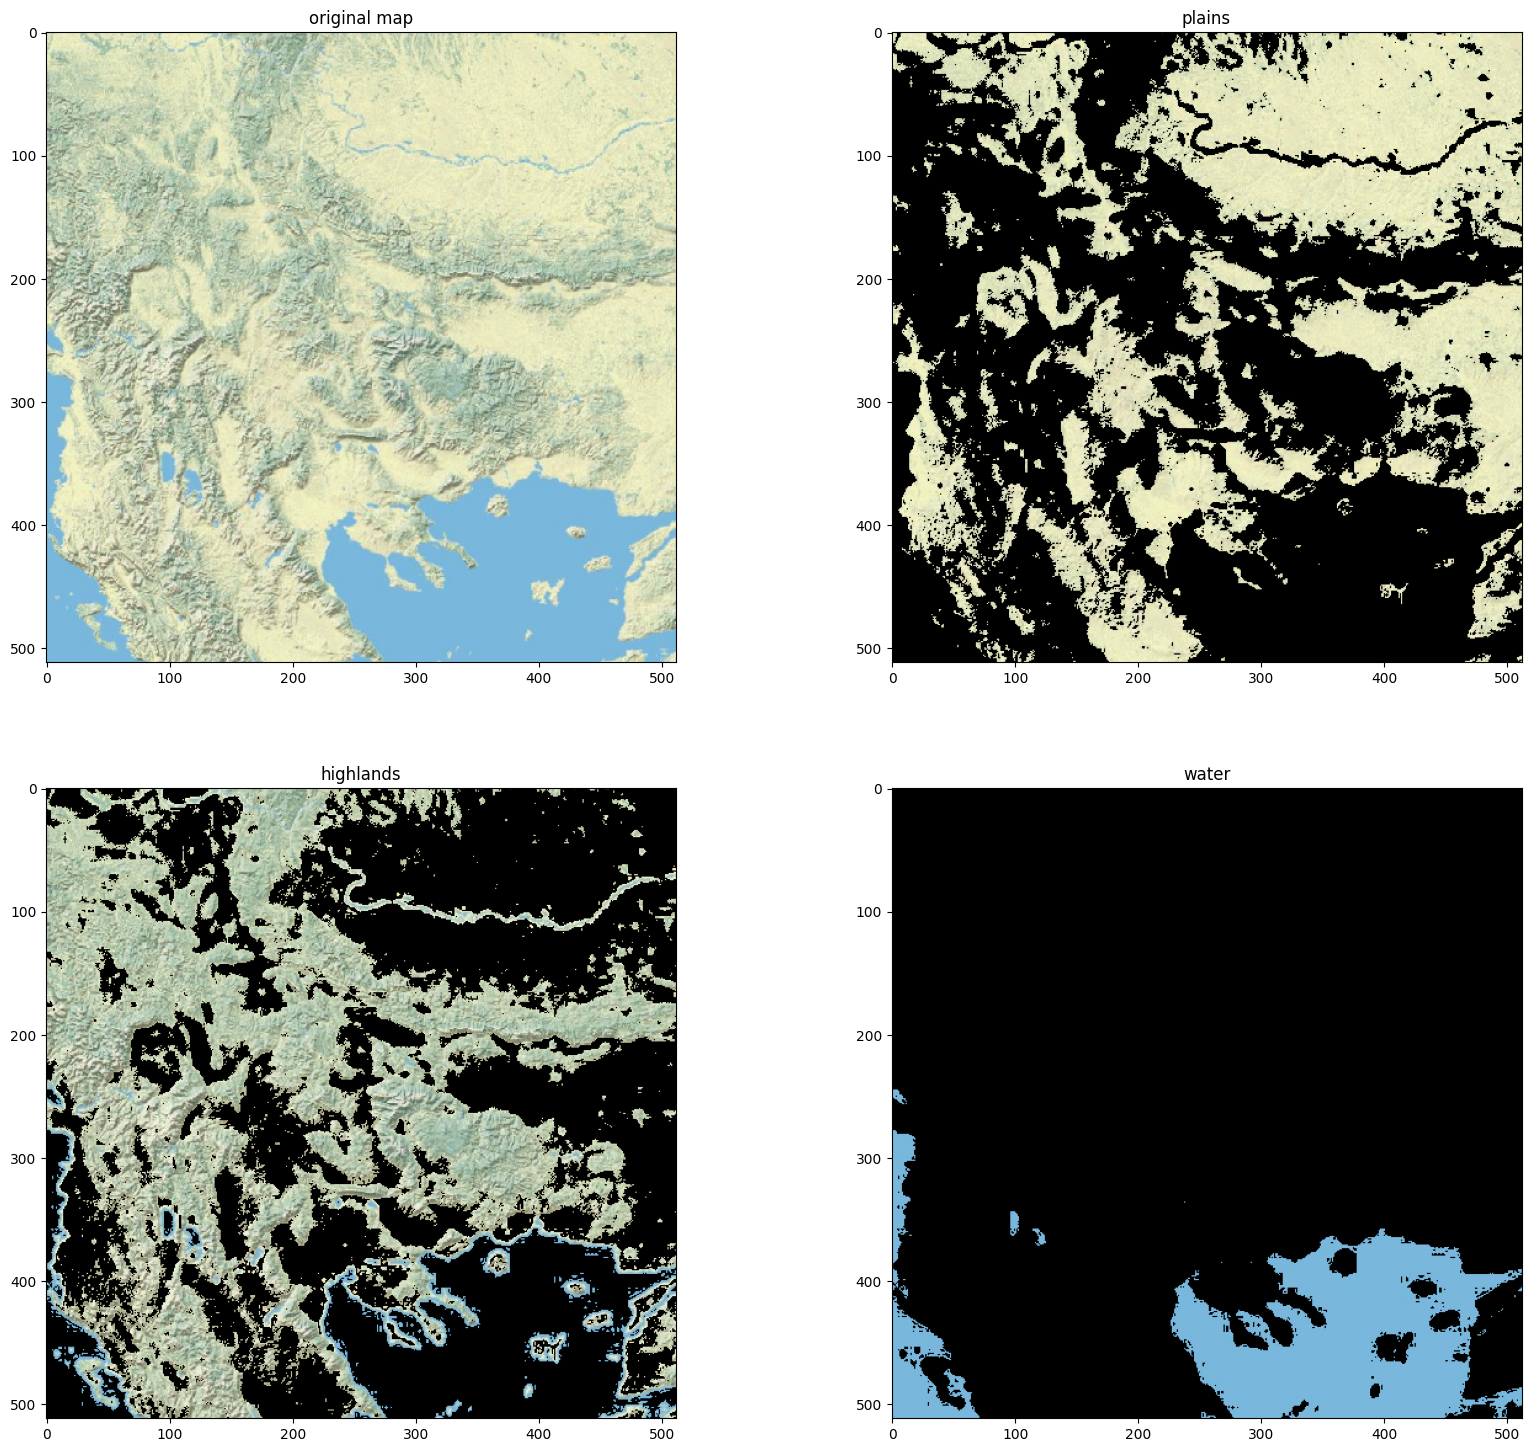

In [147]:
plt.figure(figsize = (20,18))
plt.subplot(221).set_title('original map')
plt.imshow(image)

for i in range(3):
    plt.subplot(220 + i +2).set_title(target_names[i])
    plt.imshow(output[i])
plt.show()

## Reasoning for low gamma
When gamma is low, each training point has a wide area of influence. This means the decision boundary between classes is smoother and more generalized.

- Effect: The model doesn't focus too much on individual training points. Instead, it considers the broader "picture" of the terrain, so pixels that are relatively close in color to a given class will likely be classified the same way.
- Example: If the plains are generally beige, even slight variations in the beige color across different parts of the map will still be classified as plains because the boundary between plains and other terrains is broader.

## Conclusion
In the future, you could definitely have multiple images of topographic maps to train a model like this to have it more generalized. Although looking back now, I do believe there are easier and more efficient alternative algorithms to use based on this project, such as K-Nearest Neighbors or Random Forests, creating the same or even better results at a more efficient time-frame.